<a href="https://colab.research.google.com/github/waltertaya/MachineLearningTutorial/blob/main/Perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

### **Setting a random seed**

In [ ]:
np.random.seed(42)

### **Step Function**

In [ ]:
def step_function(x):
    if x >= 0:
        return 1
    return 0

In [ ]:
def prediction(X, w, b):
  return step_function((np.matmul(X ,w) + b)[0])

In [ ]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [ ]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


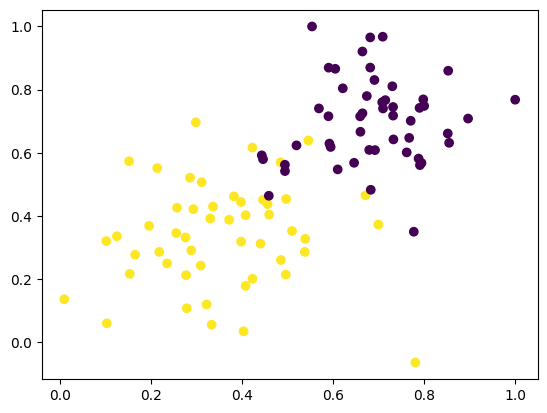

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your X and y data defined somewhere

df = pd.read_csv('/content/data.csv', header=None)
X = np.array(df.iloc[:, 0:2])
y = np.array(df.iloc[:, 2])

# Train the perceptron
boundary_lines = trainPerceptronAlgorithm(X, y)

# Plotting the scatter graph
plt.scatter(X[:, 0], X[:, 1], c=y)



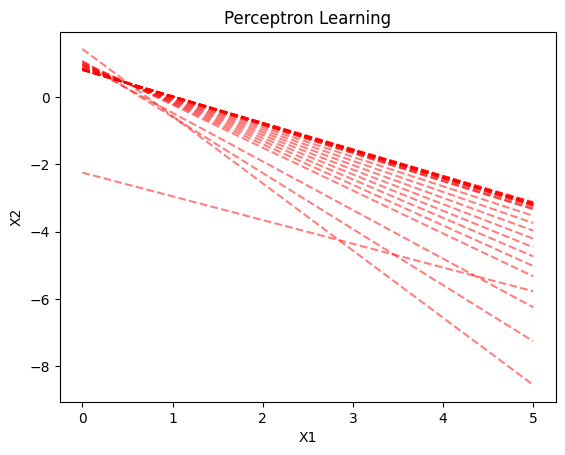

In [ ]:
# Plotting the decision boundary lines
for m, c in boundary_lines:
    plt.plot([0, 5], [c, m * 5 + c], 'r--', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning')
plt.show()

In [ ]:
df.columns = ['X1', 'X2', 'y']
df

,X1,X2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0
